# LSA

In [1]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))

ModuleNotFoundError: No module named 'numpy'

In [9]:
df=pd.read_csv('jurnal.csv', usecols =['Abstrak_indo'])

In [11]:
df.head(10)

,Abstrak_indo
0,Toko Batik Tulis Madura merupakan salah satu t...
1,PT. Pos Indonesia (Persero) merupakan salah sa...
2,Kabupaten Pamekasan merupakan salah satu pusat...
3,Pemilihan supplier merupakan salah satu isu p...
4,ABSTRAK\r\nData yang terdapat pada SMA Wachid ...
5,Sumber daya manusia mutlak dibutuhkan untuk ke...
6,Deteksi manusia merupakan suatu aplikasi yang...
7,Aplikasi klasifikasi status gizi balita ini di...
8,Setiap perusahaan mengharapkan adanya hubungan...
9,Sebuah citra banyak diterapkan dalam berbagai ...


In [14]:
def clean_text(headline):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(headline)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text


In [15]:
# time taking
df['Abstrak_indo_cleaned']=df['Abstrak_indo'].apply(clean_text)

In [16]:
df.head()

,Abstrak_indo,Abstrak_indo_cleaned
0,Toko Batik Tulis Madura merupakan salah satu t...,Toko Batik Tulis Madura merupakan salah satu t...
1,PT. Pos Indonesia (Persero) merupakan salah sa...,Indonesia Persero merupakan salah satu perusah...
2,Kabupaten Pamekasan merupakan salah satu pusat...,Kabupaten Pamekasan merupakan salah satu pusat...
3,Pemilihan supplier merupakan salah satu isu p...,Pemilihan supplier merupakan salah satu pentin...
4,ABSTRAK\r\nData yang terdapat pada SMA Wachid ...,ABSTRAK Data yang terdapat pada Wachid Hasyim ...


In [17]:
df.drop(['Abstrak_indo'],axis=1,inplace=True)

In [18]:
df.head()

,Abstrak_indo_cleaned
0,Toko Batik Tulis Madura merupakan salah satu t...
1,Indonesia Persero merupakan salah satu perusah...
2,Kabupaten Pamekasan merupakan salah satu pusat...
3,Pemilihan supplier merupakan salah satu pentin...
4,ABSTRAK Data yang terdapat pada Wachid Hasyim ...


In [19]:
df['Abstrak_indo_cleaned'][0]

'Toko Batik Tulis Madura merupakan salah satu toko yang telah beroperasi sejak tahun 2011 dengan menggunakan website e-commerce Walau telah menggunakan model e-commerce website tersebut memiliki kekurangan yaitu belum fitur rekomndasi untuk memudahkan konsumen mencari barang yang ingin dibelinya Penelitian bertujuan membuat rekomendasi dengan decision untuk membantu pelanggan dalam memilih produk website Toko Batik Tulis Madura Teknik pengumpulan analis data terdiri dari Studi Literatur yang berhubungan dengan decision multi criterion Observasi dilakukan terhadap website Toko Batik Tulis Madura Interview dilakukan kepada pemilik website Toko Batik Tulis Madura Pembuatan implementasi pada Penelitian menggunakan model waterfall Jenis decision yang akan diimplementasikan adalah Multi Criteria Filtering Metode pembobotan yang digunakan pada Multi Criteria Filtering yaitu Decision Matrix Hasil ujicoba dengan jumlah sample percobaan sebanyak kali data perconbaan pencarian presentase akurasi 

In [20]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000) 
# to play with. min_df,max_df,max_features etc...

In [21]:
vect_text=vect.fit_transform(df['Abstrak_indo_cleaned'])

In [22]:
print(vect_text.shape)
print(vect_text)

(60, 1000)
  (0, 965)	0.345916940950532
  (0, 74)	0.22892583178997186
  (0, 974)	0.25689155580262774
  (0, 455)	0.21829375696477538
  (0, 566)	0.027321748445371784
  (0, 793)	0.02947993532903489
  (0, 798)	0.03006449946217725
  (0, 998)	0.10345794294041542
  (0, 916)	0.07126015599083284
  (0, 815)	0.0691833881901064
  (0, 902)	0.0522709587080435
  (0, 1)	0.06037522681742574
  (0, 172)	0.0712712402708651
  (0, 545)	0.06746551297761273
  (0, 995)	0.41510032914063844
  (0, 151)	0.20755016457031922
  (0, 577)	0.11446291589498593
  (0, 940)	0.027321748445371784
  (0, 507)	0.030669578755966955
  (0, 997)	0.06389484363010381
  (0, 81)	0.0522709587080435
  (0, 279)	0.0484232965748123
  (0, 982)	0.05345343020314881
  (0, 516)	0.054573439241193844
  (0, 410)	0.06422288895065693
  :	:
  (59, 299)	0.5335072980252071
  (59, 530)	0.038242168129767516
  (59, 850)	0.03625013266330325
  (59, 9)	0.03625013266330325
  (59, 719)	0.06385719606030678
  (59, 65)	0.03366356073892819
  (59, 971)	0.059278588669

In [23]:
idf=vect.idf_

In [25]:
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)
# print(l)
print(l[0],l[-1])
print(dd['yang'])
print(dd['wajah'])  # police is most common and forecast is least common among the news headlines.

yang wajah
1.0
4.417726683613366


In [26]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)


In [27]:
print(lsa_top)
print(lsa_top.shape)  # (no_of_doc*no_of_topics)

[[ 2.94621783e-01  1.14284142e-02 -7.93177351e-02  1.43787806e-01
  -1.69167977e-01 -1.33479482e-01  7.54971602e-04 -8.47349114e-02
   5.56171720e-01  3.00287419e-01]
 [ 3.12924002e-01 -1.13953528e-01 -1.16543532e-01 -7.31609178e-02
  -5.87801002e-02 -1.37875420e-01 -1.60644013e-01  8.15194883e-02
   2.82950028e-02  1.44308558e-01]
 [ 3.15876446e-01  3.92275463e-02 -7.29732514e-02  2.12513524e-01
  -1.91671745e-01 -1.75683185e-01  2.46247292e-02 -6.66666155e-02
   5.10893907e-01  3.61791671e-01]
 [ 2.36507649e-01 -9.40772468e-02 -1.60423693e-01 -2.25230320e-02
  -7.09792431e-02 -6.12045093e-02  1.71505553e-01 -8.79197555e-02
   1.09858280e-01 -9.60265005e-02]
 [ 3.08898547e-01 -1.18551942e-02 -2.50981218e-02 -6.10313660e-02
   7.77796435e-02  7.27812159e-02 -1.91285545e-01  9.48380084e-02
   1.04618613e-01  6.25058256e-02]
 [ 3.28663305e-01 -1.82776721e-01 -3.17252494e-01 -1.33209602e-01
  -9.90653639e-02 -1.62090349e-01  3.36326668e-01 -1.61637384e-01
  -1.31629912e-01 -1.64335883e-01

In [28]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
yang citra dengan pada untuk dari metode sistem dalam data 

Topic 1: 
citra tulisan tangan pengenalan batik fitur ekstraksi tekstur ciri wajah 

Topic 2: 
game mobile pembelajaran android teknologi gerakan virtual reality sapi algoritma 

Topic 3: 
arsitektur citra bangkalan enterprise batik togaf informasi dinas perdagangan instansi 

Topic 4: 
arsitektur tangan tulisan pengenalan enterprise togaf telapak sistem bangkalan informasi 

Topic 5: 
gizi status pasien balita makanan keputusan pendukung menu bayes naïve 

Topic 6: 
kriteria reality virtual karyawan augmented keputusan dunia teknologi second life 

Topic 7: 
reality virtual dokumen augmented penjadwalan dunia second life hujan kuliah 

Topic 8: 
batik commerce website tulis model decision toko madura penjadwalan pamekasan 

Topic 9: 
gizi batik reality status virtual peramalan commerce website tulis balita 



In [29]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 
# n_components is the number of topics

In [30]:
lda_top=lda_model.fit_transform(vect_text)

In [31]:
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)


(60, 10)
[[0.0132859  0.0132856  0.88042955 0.01328551 0.01328557 0.01328544
  0.01328562 0.01328564 0.0132856  0.01328556]
 [0.01259872 0.01259861 0.0125986  0.01259843 0.01259861 0.88661199
  0.01259852 0.01259863 0.01259939 0.0125985 ]
 [0.01332315 0.01332277 0.8800941  0.0133228  0.01332282 0.01332293
  0.0133229  0.01332297 0.01332273 0.01332284]
 [0.01402815 0.01402798 0.01402811 0.01402833 0.01402819 0.01402816
  0.01402831 0.01402936 0.87374516 0.01402823]
 [0.01282357 0.01282312 0.01282339 0.01282324 0.01282342 0.01282331
  0.01282341 0.88458985 0.01282333 0.01282335]
 [0.87097585 0.01433571 0.0143359  0.01433603 0.01433589 0.01433614
  0.01433604 0.01433604 0.01433616 0.01433623]
 [0.01173059 0.89442335 0.01173056 0.01173047 0.01173044 0.01173229
  0.0117305  0.01173075 0.01173043 0.01173062]
 [0.01552092 0.01552032 0.01552135 0.01552021 0.01552035 0.01552022
  0.01552034 0.86031577 0.01552017 0.01552034]
 [0.0148776  0.01487743 0.01487731 0.01487718 0.01487739 0.01487764
  0

In [32]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum)  

1.0000000000000002


In [33]:
# composition of doc 0 for eg
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  1.3285901487371006 %
Topic  1 :  1.3285602228967217 %
Topic  2 :  88.04295538450366 %
Topic  3 :  1.3285513698445734 %
Topic  4 :  1.3285565180898746 %
Topic  5 :  1.328544017241651 %
Topic  6 :  1.328561952865611 %
Topic  7 :  1.3285638706138307 %
Topic  8 :  1.328560145287098 %
Topic  9 :  1.3285563699198957 %


In [34]:
print(lda_model.components_)
print(lda_model.components_.shape)  # (no_of_topics*no_of_words)

[[0.90038213 0.83125137 0.81044032 ... 0.96844698 0.94291339 0.84881495]
 [0.91109702 0.87067832 0.63945693 ... 0.87580363 0.97441072 1.05082202]
 [0.6888835  0.83795528 0.88243727 ... 0.96600802 0.89495942 0.80835129]
 ...
 [0.75684549 0.93072313 0.86666127 ... 0.84711017 0.77235137 0.81364776]
 [0.93761201 0.77397308 0.80687726 ... 0.88485764 0.8925799  0.81234621]
 [0.76464727 0.76478814 0.93785791 ... 0.88288521 0.83466938 0.72555995]]
(10, 1000)


In [35]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
browser single tulisan terus seorang augmented diperlukan kerapan dokter memperkirakan 

Topic 1: 
pasien kuliah mahasiswa sistem yogyakarta kinerja bangkalan least dihasilkan histogram 

Topic 2: 
batik berbeda self player tetap penyampaian serta seringkali selain pendeteksian 

Topic 3: 
kriteria strategy bobot dikarenakan mudah first tentunya mendekripsi smarter pencarian 

Topic 4: 
game nilai lain 2010 karapan pengelolaan menjadikan pengukuran puskesmas pemetaan 

Topic 5: 
citra yang second terjadi dihasilkan smartphone konsep perusahaan tentunya percobaan 

Topic 6: 
senyum wajah jari machine finite mempertahankan platform permainan memecahkan tes 

Topic 7: 
budaya gizi khususnya kepada kurang minimal sedikit kamera indikator balita 

Topic 8: 
smoothing tersebut keragaman memperoleh mirip training supply persero part didasarkan 

Topic 9: 
bobot sulit panoramic satu basic stok kali algoritma korespondensi adalah 



In [37]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [38]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
 

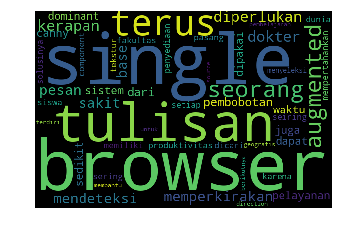

In [39]:
# topic 0
draw_word_cloud(0)

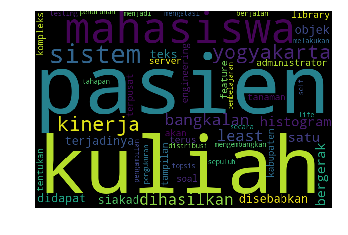

In [40]:
# topic 1
draw_word_cloud(1)